1.   Documenta tu colab
2.   Calcular la ley de las siguientes variables aleatorias
     *   La diferencia de las caras es mayor que 1
     *   La suma de las caras sea par
3. Verifica en cada caso, que
   $$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$
4. Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)  
     Aquí pueden utilizar Python (para los que ya tengan conocimiento previo de matplotlib) o dibujado a mano / tablet /etc
5. Sube tu notebook a GitHub

In [1]:
# Dependencias
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from fractions import Fraction

In [2]:
def diferencia_mayor_que_uno():
    '''
    Calcula la probabilidad de que la diferencia entre las caras de dos dados sea mayor que 1
    Argumentos:
        Ninguno
    Retorna:
        (float): La probabilidad de que la diferencia sea mayor que 1
    '''
    # Genera todas las combinaciones posibles de dos dados de 6 caras (1 a 6) y las guarda en una lista de tuplas (x, y) y se repiten 2 veces (porque son dos dados)
    resultados = list(itertools.product(range(1, 7), repeat=2))
    
    # Calcula cuántas combinaciones tienen una diferencia mayor que 1, es decir, cuántas combinaciones tienen una diferencia mayor que 1
    cuenta_mayor_que_uno = sum(abs(x - y) > 1 for x, y in resultados)
    
    # La probabilidad es el número de combinaciones favorables dividido entre el total de combinaciones
    probabilidad = cuenta_mayor_que_uno / len(resultados)
    
    return probabilidad

# las variables x e y son declaradas implícitamente dentro de una comprensión de lista

In [3]:
def suma_par():
    '''
    Calcula la probabilidad de que la suma de las caras de dos dados sea par
    Argumentos:
        Ninguno
    
    Retorna:
        (float): La probabilidad de que la suma sea par
    '''
    resultados = list(itertools.product(range(1, 7), repeat=2))
    # Calcula cuántas combinaciones tienen una suma par
    cuenta_suma_par = sum((x + y) % 2 == 0 for x, y in resultados)
    
    # La probabilidad es el número de combinaciones favorables dividido entre el total de combinaciones
    probabilidad = cuenta_suma_par / len(resultados)
    
    return probabilidad

In [4]:
def funcion_distribucion_suma(n):
    '''
    Calcula la función de distribución de la suma de los resultados de dos dados que da como resultado n
    
    Argumento:
        n (int): La suma de los resultados, se deja n como argumento para poder calcular la probabilidad de obtener cualquier suma
    
    Retorna:
        (float): La probabilidad de obtener la suma n
    '''
    # Genera todas las combinaciones posibles de dos dados
    resultados = list(itertools.product(range(1, 7), repeat=2))
    
    # Cuenta cuántas combinaciones suman exactamente n
    cuenta_suma_n = sum(x + y == n for x, y in resultados)
    
    # La probabilidad es el número de combinaciones favorables dividido entre el total de combinaciones
    probabilidad = cuenta_suma_n / len(resultados)
    
    return probabilidad


# Uso de las funciones

## 1) Probabilidad de que la diferencia sea mayor que 1

In [5]:
print("Probabilidad de que la diferencia sea mayor que 1:", diferencia_mayor_que_uno())

Probabilidad de que la diferencia sea mayor que 1: 0.5555555555555556


## 2) Probabilidad de que la suma sea par

In [6]:
print("Probabilidad de que la suma sea par:", suma_par())

Probabilidad de que la suma sea par: 0.5


## 1) y 2)  Verifiquemos con diccionarios (ya tendran dentro de la función la suma de las probabilidades) 

In [7]:
def calcular_ley_diferencia_mayor_uno():
    """
    Calcula la ley de probabilidad para la diferencia de las caras de dos dados mayor que 1
    También verifica que la suma de las probabilidades sea igual a 1
    
    Retorna:
        pd.Series: Ley de probabilidad ordenada por la diferencia de caras
    """
    # Genera todas las combinaciones de dos dados
    omega = list(itertools.product(range(1, 7), repeat=2))
    
    # Genera un diccionario con las diferencias mayores a 1
    S_d = {(i, j): i - j for i, j in omega if abs(i - j) > 1}
    
    # Inicializa un diccionario para agrupar las diferencias
    dS_d = {}
    
    # Agrupa los pares de dados por la diferencia
    for i, diferencia in S_d.items():
        if diferencia not in dS_d:
            dS_d[diferencia] = set()
        dS_d[diferencia].add(i)
    
    # Imprime los resultados
    print("Diferencia: Pares")
    for diferencia, pares in sorted(dS_d.items()):
        print(f"{diferencia}: {pares}")
    
    # Calcula la probabilidad para cada diferencia
    total_combinaciones = len(S_d)
    leyS_d = {k: Fraction(len(v), total_combinaciones) for k, v in dS_d.items()}
    
    # Convierte a pd.Series para ordenar
    leyS_d = pd.Series(leyS_d).sort_index()
    
    # Verifica la suma de las probabilidades
    suma_probabilidades = leyS_d.sum()
    if suma_probabilidades == 1:
        print(f"La suma de las probabilidades es {suma_probabilidades}")
    else:
        print(f"La suma de las probabilidades no es 1, es {suma_probabilidades}")

    # Retorna el DataFrame ordenado
    return leyS_d

In [8]:
def calcular_ley_suma_par():
    """
    Calcula la ley de probabilidad para la suma par de las caras de dos dados
    También verifica que la suma de las probabilidades sea igual a 1
    
    Retorna:
        pd.Series: Ley de probabilidad ordenada por la suma par de caras
    """
    # Genera todas las combinaciones de dos dados
    omega = list(itertools.product(range(1, 7), repeat=2))
    
    # Genera un diccionario con las sumas pares
    S_par = {(i, j): i + j for i, j in omega if (i + j) % 2 == 0}
    
    # Inicializa un diccionario para agrupar las sumas
    dS_par = {}
    
    # Agrupa los pares de dados por la suma
    for i, suma in S_par.items():
        if suma not in dS_par:
            dS_par[suma] = set()
        dS_par[suma].add(i)
    
    # Imprime los resultados
    print("Suma: Pares")
    for suma, pares in sorted(dS_par.items()):
        print(f"{suma}: {pares}")
    
    # Calcula la probabilidad para cada suma
    total_combinaciones = len(S_par)
    leyS_par = {k: Fraction(len(v), total_combinaciones) for k, v in dS_par.items()}
    
    # Convierte a pd.Series para ordenar
    leyS_par = pd.Series(leyS_par).sort_index()
    
    # Verifica la suma de las probabilidades
    suma_probabilidades = leyS_par.sum()
    if suma_probabilidades == 1:
        print(f"La suma de las probabilidades es {suma_probabilidades}")
    else:
        print(f"La suma de las probabilidades no es 1, es {suma_probabilidades}")

    # Retorna el DataFrame ordenado
    return leyS_par

In [9]:
# Uso de las funciones
ley_diferencia_mayor_uno_diccionario = calcular_ley_diferencia_mayor_uno()
ley_diferencia_mayor_uno_diccionario


Diferencia: Pares
-5: {(1, 6)}
-4: {(2, 6), (1, 5)}
-3: {(2, 5), (1, 4), (3, 6)}
-2: {(2, 4), (4, 6), (1, 3), (3, 5)}
2: {(3, 1), (5, 3), (6, 4), (4, 2)}
3: {(6, 3), (4, 1), (5, 2)}
4: {(6, 2), (5, 1)}
5: {(6, 1)}
La suma de las probabilidades es 1


-5    1/20
-4    1/10
-3    3/20
-2     1/5
 2     1/5
 3    3/20
 4    1/10
 5    1/20
dtype: object

In [10]:
ley_suma_par_diccionario = calcular_ley_suma_par()
ley_suma_par_diccionario

Suma: Pares
2: {(1, 1)}
4: {(3, 1), (1, 3), (2, 2)}
6: {(2, 4), (1, 5), (5, 1), (4, 2), (3, 3)}
8: {(4, 4), (6, 2), (2, 6), (5, 3), (3, 5)}
10: {(4, 6), (6, 4), (5, 5)}
12: {(6, 6)}
La suma de las probabilidades es 1


2     1/18
4      1/6
6     5/18
8     5/18
10     1/6
12    1/18
dtype: object

## 3) Verifica que la suma de las probabilidades sea 1

$$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$

In [11]:
# Calcular las probabilidades de obtener cada suma de 2 a 12 pondre el segundo elemnto para se vea el 0 (por que no hay suma que de 1 o 0 de los dados)
probabilidades = [funcion_distribucion_suma(n) for n in range(1, 13)]
probabilidades


[0.0,
 0.027777777777777776,
 0.05555555555555555,
 0.08333333333333333,
 0.1111111111111111,
 0.1388888888888889,
 0.16666666666666666,
 0.1388888888888889,
 0.1111111111111111,
 0.08333333333333333,
 0.05555555555555555,
 0.027777777777777776]

In [12]:
print(f"La probabilidad de obtener una suma de 0 es: {funcion_distribucion_suma(0)}\n"
      f"La probabilidad de obtener una suma de 1 es: {funcion_distribucion_suma(1)}\n"
      f"La probabilidad de obtener una suma de 2 es: {funcion_distribucion_suma(2)}\n"
      f"La probabilidad de obtener una suma de 3 es: {funcion_distribucion_suma(3)}\n"
      f"La probabilidad de obtener una suma de 12 es: {funcion_distribucion_suma(12)}")

La probabilidad de obtener una suma de 0 es: 0.0
La probabilidad de obtener una suma de 1 es: 0.0
La probabilidad de obtener una suma de 2 es: 0.027777777777777776
La probabilidad de obtener una suma de 3 es: 0.05555555555555555
La probabilidad de obtener una suma de 12 es: 0.027777777777777776


Sumas Posibles:

* Suma Mínima: La suma más baja que se puede obtener es 2, que ocurre cuando ambos dados muestran 1 (1 + 1 = 2)
* Suma Máxima: La suma más alta que se puede obtener es 12, que ocurre cuando ambos dados muestran 6 (6 + 6 = 12)

Para aclarar:

* Para n = 2: Solo hay una combinación posible (1, 1)
* Para n = 7: Hay seis combinaciones posibles, como (1, 6), (2, 5), etc
* Para n > 12 y n < 2: No hay combinaciones posibles, por lo que la probabilidad es 0

In [13]:
# Verificar la suma de las probabilidades
suma_probabilidades = sum(probabilidades)
if round(abs(suma_probabilidades - 1)) < 1:
    print(f"La suma de las probabilidades es aproximadamente 1, ya que la suma es {suma_probabilidades}")  
else:
    print(F"La suma de las probabilidades no es 1, ya que la suma de la variables es {suma_probabilidades}")

La suma de las probabilidades es aproximadamente 1, ya que la suma es 1.0000000000000002


La diferencia entre 1 y 1.0000000000000002 es una manifestación normal de errores de redondeo inherentes a la representación de números en punto flotante en las computadoras (esto no lo sabia pense que eran 100% precisas)

Pero ahora se que: Aunque el resultado no es exactamente 1, está extremadamente cerca, lo cual es suficiente para la mayoría de las aplicaciones prácticas en programación

Por lo tanto, en la mayoría de los casos(segun internet), una diferencia pequeña como esta se considera aceptable y no afecta significativamente los resultados de los cálculos

Curioso como con listas obtenemos 1.0000000000000002 y con diccionarios 1 (no se si sea por la forma en que se almacenan los datos)

## 4) Gráfica y calcula la función de distribución de la v.a. S

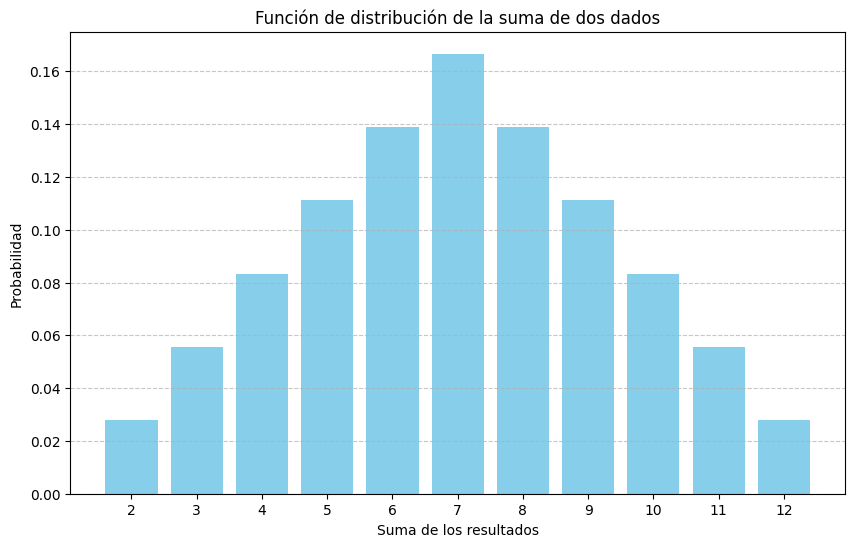

In [14]:
# Calcular las probabilidades para cada suma de 2 a 12
sumas = range(2, 13)
probabilidades = [funcion_distribucion_suma(n) for n in sumas]

# Graficar
plt.figure(figsize=(10, 6))
plt.bar(sumas, probabilidades, color='skyblue')
plt.xlabel('Suma de los resultados')
plt.ylabel('Probabilidad')
plt.title('Función de distribución de la suma de dos dados')
plt.xticks(sumas)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Características de la distribución de sumas de dados
* Distribución simétrica:

La distribución de la suma de dos dados es simétrica alrededor de la media (7 en este caso)

Esto se parece a la forma de una distribución normal, que también es simétrica

* Forma de campana:

Aunque no es una distribución normal perfecta, la gráfica puede tener una forma similar a una campana (más altas en el centro y más bajas en los extremos)

Esto se debe a que hay más combinaciones posibles para las sumas cercanas a 7 y menos para las sumas extremas (2 o 12)


* ¿Por que no es exactamente nnormal?

Número finito de pbservaciones:
La distribución de la suma de dos dados tiene un número finito de posibles resultados (11 posibles sumas)

La distribución normal es una distribución continua con infinitos posibles resultados


* No es continua:

La distribución de la suma de dos dados es discreta. cada suma tiene una probabilidad exacta y no hay valores intermedios posibles (como en una distribución normal continua)

* Forma de la distribución:

La distribución de la suma de dos dados sigue una distribución conocida como distribución de la suma de variables aleatorias discretas, que se puede aproximar a una normal cuando el número de dados aumenta debido al Teorema central del límite

la gráfica de barras para la suma de dos dados puede parecerse a una distribución normal, pero no es exactamente una distribución normal. La similitud en la forma se debe a la distribución de las sumas de dos dados, que tiende a ser simétrica y a formar una curva que se asemeja a una campana